In [193]:
import json
import pprint
import pandas as pd
import io
import yaml
import pylab
!pip install numpy==1.16.1
import numpy as np

In [194]:

'''import sys
reload(sys)
sys.setdefaultencoding('utf-8')'''

'''def _decode_dict(data):
    rv = {}
    for key, value in data.iteritems():
        if isinstance(key, unicode):
            key = key.encode('utf-8')
        if isinstance(value, unicode):
            value = value.encode('utf-8')
        elif isinstance(value, list):
            value = _decode_list(value)
        elif isinstance(value, dict):
            value = _decode_dict(value)
        rv[key] = value
    return rv
def _decode_list(data):
    rv = []
    for item in data:
        if isinstance(item, unicode):
            item = item.encode('utf-8')
        elif isinstance(item, list):
            item = _decode_list(item)
        elif isinstance(item, dict):
            item = _decode_dict(item)
        rv.append(item)
    return rv'''

def parser(file_path):
    with io.open(file_path, encoding='utf-8') as f:
        #io.open(f, encoding='utf-8-sig')
        #raw_data = yaml.safe_load(f)
        raw_data = json.load(f, encoding ='utf-8')
        #raw_data = json.load(f, object_hook=_decode_dict)
    return raw_data



In [195]:
raw_data = parser('clip_226.json')
raw_data

{'clip_id': '226',
 'actor': {'11': {'age': 59, 'gender': '남성'},
  '12': {'age': 33, 'gender': '여성'}},
 'nr_frame': '2010',
 'video_size': {'width': '1920', 'height': '1080'},
 'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
 'data': {'140': {'1': {'label': '사람',
    'frame': '140',
    'xtl': '855.79',
    'ytl': '335.31',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '141': {'1': {'label': '사람',
    'frame': '141',
    'xtl': '855.79',
    'ytl': '333.23',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '142': {'1': {'label': '사람',
    'frame': '142',
    'xtl': '855.79',
    'ytl': '331.15',
    'xbr': '1306.01',
    'ybr': '978.11',
    'position': {},
    'predicate': {},
    'person_id': '11'}},
  '143': {'1': {'label': '사람',
    'frame': '143',
    'xtl': '855.79',
    'ytl': '329.07'

In [196]:
columns = ['clip_id', 'nr_frame', 'script', 'script_start', 'script_end', 'sound_emotion', 'sound_arousal', 'sound_valence']
df = pd.DataFrame(columns=columns)
df

Empty DataFrame
Columns: [clip_id, nr_frame, script, script_start, script_end, sound_emotion, sound_arousal, sound_valence]
Index: []

In [197]:
info = {}

temp = set()

data = raw_data['data']

sound_flag = False
text_flag = False

for i in data:
    info[i] = {}
    info[i]['clip_id'] = raw_data['clip_id']
    info[i]['nr_frame'] = raw_data['nr_frame']
    info[i]['situation'] = raw_data['situation']

    for j in data[i].keys(): # j can be '1' or '2'
        if 'emotion' in data[i][j]:
            emotion = data[i][j]['emotion']
#             print(emotion)
            if 'sound' in emotion:
                info[i]['sound_arousal'] = emotion['sound']['arousal']
                info[i]['sound_emotion'] = emotion['sound']['emotion']
                info[i]['sound_valence'] = emotion['sound']['valence']
#                 sound_flag = True
        if 'text' in data[i][j]:
            info[i]['script'] = data[i][j]['text']['script']
            info[i]['script_start'] = data[i][j]['text']['script_start']
            info[i]['script_end'] = data[i][j]['text']['script_end']
#             text_flag = True

#         if sound_flag and text_flag:
#             break
#     if sound_flag and text_flag:
# #         break
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 

          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1128': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1129': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는

          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1240': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1241': {'clip_id': '226',
          'nr_frame': '2010',
      

          'sound_valence': 5.0},
 '1347': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1348': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1349': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,

          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1466': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1467': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1468': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '

 '1599': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '160': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1600': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0

          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1725': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1726': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1727': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'scri

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1838': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1839': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arous

 '1992': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1993': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1994': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1995': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1996': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
         

         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '425': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '426': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '427': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         '

 '564': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '565': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '566': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.'

         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '714': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '715': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '849': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '850': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad'

 '971': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '972': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '973': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 

In [198]:
for i in info.keys():
#     print(info[i])
    try:
        info[i]['frame'] = i
#         print(type(info[i]['frame']))
    except:
        print(type(i))
    df = df.append(info[i], ignore_index=True)
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'frame': '1000',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'frame': '1001',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'frame': '1002',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'sc

          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1129': {'clip_id': '226',
          'frame': '1129',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1130': {'clip_id': '226',
          'frame': '1130',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
             

          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1236': {'clip_id': '226',
          'frame': '1236',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1237': {'clip_id': '226',
          'frame': '1237',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주

 '1335': {'clip_id': '226',
          'frame': '1335',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1336': {'clip_id': '226',
          'frame': '1336',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1337': {'clip_id': '226',
          'frame': '1337',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'sc

                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1450': {'clip_id': '226',
          'frame': '1450',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1451': {'clip_id': '226',
          'frame': '1451',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1452': {'clip_id': '226',
          'frame': '145

 '1564': {'clip_id': '226',
          'frame': '1564',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1565': {'clip_id': '226',
          'frame': '1565',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1566': {'clip_id': '226',
          'frame': '1566',
          'nr_frame': '2010',
 

          'sound_valence': 5.0},
 '1683': {'clip_id': '226',
          'frame': '1683',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1684': {'clip_id': '226',
          'frame': '1684',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1685': {'clip_id': '226',
          'frame': '1685'

 '1794': {'clip_id': '226',
          'frame': '1794',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1795': {'clip_id': '226',
          'frame': '1795',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1796': {'clip_id': '226',
          'frame': '1796',
          'nr_frame': '2010',
          'script': '

 '1896': {'clip_id': '226',
          'frame': '1896',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1897': {'clip_id': '226',
          'frame': '1897',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1898': {'clip_id': '226',
          'frame': '1898',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.'

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '256': {'clip_id': '226',
         'frame': '256',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '257': {'clip_id': '226',
         'frame': '257',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '258': {'clip_id': '226',
         'frame': '258',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '259': {'clip_id': '226',
         'frame': '259',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화

         'frame': '410',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '411': {'clip_id': '226',
         'frame': '411',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '412': {'clip_id': '226',
         'frame': '412',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 38

         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '555': {'clip_id': '226',
         'frame': '555',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '556': {'clip_id': '226',
         'frame': '556',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '667': {'clip_id': '226',
         'frame': '667',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '668': {'clip_id': '226',
         'frame': '668',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 

         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '787': {'clip_id': '226',
         'frame': '787',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '788': {'clip_id': '226',
         'frame': '788',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situ

         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '893': {'clip_id': '226',
         'frame': '893',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '894': {'clip_id': '226',
         'frame': '894',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '895': {'clip_id': '226',
         'frame': '895',
     

In [199]:
df

clip_id nr_frame script script_start script_end sound_emotion  \
0        226     2010    NaN          NaN        NaN           NaN   
1        226     2010    NaN          NaN        NaN           NaN   
2        226     2010    NaN          NaN        NaN           NaN   
3        226     2010    NaN          NaN        NaN           NaN   
4        226     2010    NaN          NaN        NaN           NaN   
...      ...      ...    ...          ...        ...           ...   
1865     226     2010    NaN          NaN        NaN           NaN   
1866     226     2010    NaN          NaN        NaN           NaN   
1867     226     2010    NaN          NaN        NaN           NaN   
1868     226     2010    NaN          NaN        NaN           NaN   
1869     226     2010    NaN          NaN        NaN           NaN   

      sound_arousal  sound_valence frame  \
0               NaN            NaN   140   
1               NaN            NaN   141   
2               NaN            NaN   142   
3               NaN            NaN   143   
4               NaN            NaN   144   
...             ...            ...   ...   
1865            NaN            NaN  2005   
1866            NaN            NaN  2006   
1867            NaN            NaN  2007   
1868            NaN            NaN  2008   
1869            NaN            NaN  2009   

                                              situation  
0     까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1     까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
2     까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
3     까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
4     까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
...                                                 ...  
1865  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1866  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1867  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1868  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1869  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  

[1870 rows x 10 columns]

In [200]:
df[df['sound_emotion'].notnull()]

clip_id nr_frame           script script_start script_end sound_emotion  \
181      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
182      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
183      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
184      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
185      226     2010    앗. 오랜만에 오셨네요.          321        380           hap   
...      ...      ...              ...          ...        ...           ...   
1774     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1775     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1776     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1777     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   
1778     226     2010  그러면 뭐. 네. 고마워요.         1798       1918           hap   

      sound_arousal  sound_valence frame  \
181             6.0            7.0   321   
182             6.0            7.0   322   
183             6.0            7.0   323   
184             6.0            7.0   324   
185             6.0            7.0   325   
...             ...            ...   ...   
1774            4.0            7.0  1914   
1775            4.0            7.0  1915   
1776            4.0            7.0  1916   
1777            4.0            7.0  1917   
1778            4.0            7.0  1918   

                                              situation  
181   까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
182   까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
183   까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
184   까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
185   까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
...                                                 ...  
1774  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1775  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1776  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1777  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  
1778  까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...  

[1473 rows x 10 columns]

In [201]:
import numpy as np
npy_save = np.array(df)
npy_save

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

In [202]:
np.save('clean_data.npy', npy_save)

In [203]:
clean_data = np.load('clean_data.npy',allow_pickle=True)

In [204]:
clean_data

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

# load and match frame

### get duration of mp4 file

In [205]:
import subprocess as sp
import json

def probe(filename):
    command = ["ffprobe",
            "-loglevel",  "quiet",
            "-print_format", "json",
             "-show_format",
             "-show_streams",
             filename
             ]

    pipe = sp.Popen(command, stdout=sp.PIPE, stderr=sp.STDOUT)
    out, err = pipe.communicate()
    return json.loads(out)

def duration(filename):
     #Video's duration in seconds, return a float number
    
    _json = probe(filename)

    if 'format' in _json:
        if 'duration' in _json['format']:
            return float(_json['format']['duration'])

    if 'streams' in _json:
        # commonly stream 0 is the video
        for s in _json['streams']:
            if 'duration' in s:
                return float(s['duration'])

    # if everything didn't happen,
    # we got here because no single 'return' in the above happen.
    raise Exception('I found no duration')

In [206]:
duration(filename='clip_226.mp4')

67.07

# After parsing

In [207]:

import os

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
!pip install librosa
import librosa
# And the display module for visualization
import librosa.display

In [208]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
print(clean_data.shape)
all_real_fr_num = clean_data.shape[0] #총개수
print(all_real_fr_num)
print(clean_data[0])
all_fr_num = clean_data[0][1] #써있는전체개수
print(all_fr_num)
start_fr_num = clean_data[0][8] #시작프레임
print(start_fr_num) 

(1870, 10)
1870
['226' '2010' nan nan nan nan nan nan '140'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']
2010
140


In [209]:

audio_path = '/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4' #자동화
print(audio_path)
y, sr = librosa.load(audio_path)
#y, sr = librosa.load('clip_226.mp4')

/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4


In [210]:
print(y.shape) 
y = y.tolist()

(1478894,)


In [211]:
print(sr) #sampling rate
sr_f = float(sr)

22050


In [212]:
t = np.array(list(range(0,1478894,1)))
t = t*(1/sr_f)
print(t)
print(t.shape)
t = t.tolist()

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 6.70698866e+01
 6.70699320e+01 6.70699773e+01]
(1478894,)


<function matplotlib.pyplot.show(*args, **kw)>

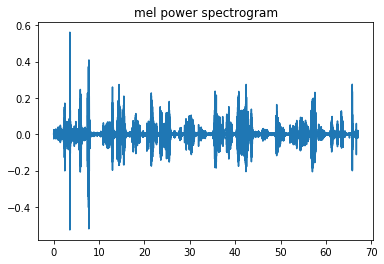

In [213]:

plt.plot(t,y)
# Put a descriptive title on the plot
plt.title('mel power spectrogram')
plt.show

In [214]:
import pandas as pd
frame_info_s =[]
frame_info_e =[]
bef_e = ''
label = []
check = 0
# frame_info : all_real_fr_num (#총개수)
# y : y.shape
#print(len(y))
#print(all_real_fr_num)
fract = len(y)/all_real_fr_num # 프레임수(이미지)에 대한 y 의 비율
print(fract)
for i in range(0, clean_data.shape[0]):
    now_e = clean_data[i][5]
    if(bef_e!=now_e): #앞과 다를때
        if(check==1):
            frame_info_e.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            check = 0
        if(pd.notnull(now_e)): #nan 이 아니면서
            print(now_e)
            label.append(now_e)
            #print(i)
            frame_info_s.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            bef_e = now_e
            check = 1
            #print((float(clean_data[i][8])- float(start_fr_num) -1))
if(check==1):
    frame_info_e.append(len(y))            
print(frame_info_s) #변화되기 직전 순간이 저장됨
print(len(frame_info_s))
print(len(frame_info_e))
#print(clean_data[180])
#print(clean_data[181])


790.8524064171123
hap
sad
neu
fear
sad
neu
hap
neu
sur
neu
hap
[142353, 385936, 576531, 633473, 710185, 944278, 1028108, 1097703, 1232148, 1266946, 1311233]
11
11


129701
182688
56943
56150
234094
72758
69596
134445
34798
44287
94903
(11,)
(128, 254)
(128, 254)
(128, 357)
(128, 357)
(128, 112)
(128, 112)
(128, 110)
(128, 110)
(128, 458)
(128, 458)
(128, 143)
(128, 143)
(128, 136)
(128, 136)
(128, 263)
(128, 263)
(128, 68)
(128, 68)
(128, 87)
(128, 87)
(128, 186)
(128, 186)


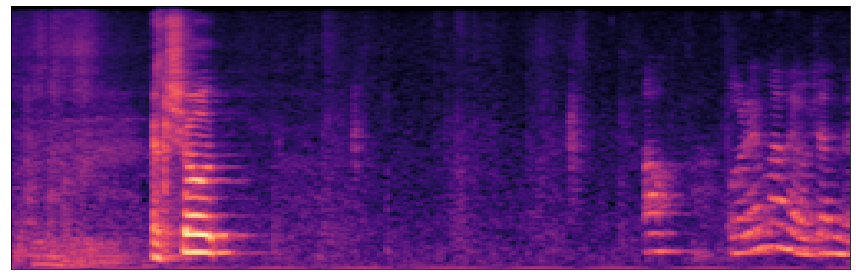

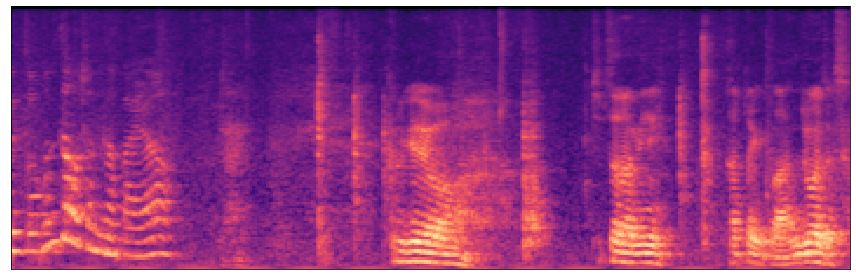

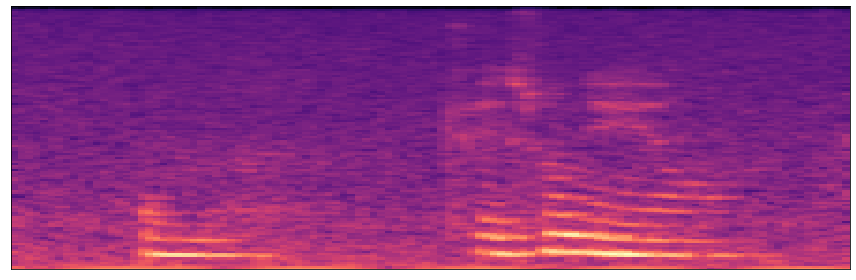

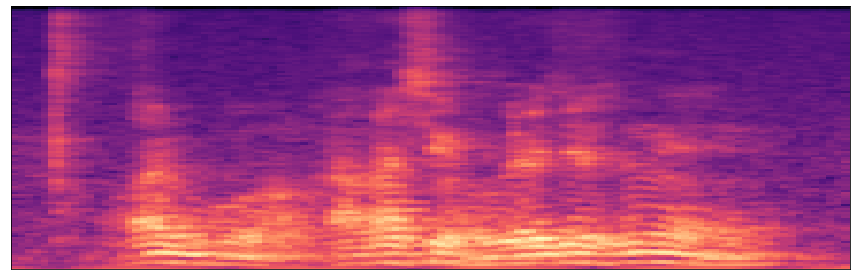

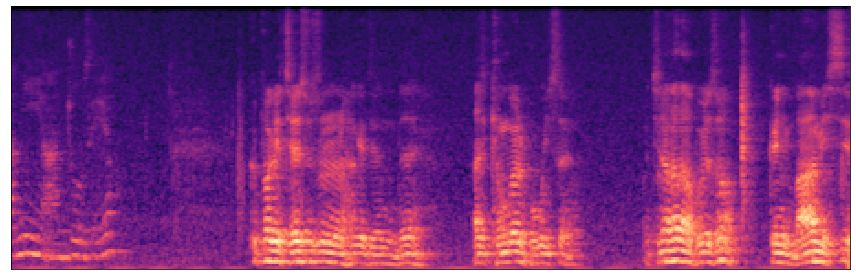

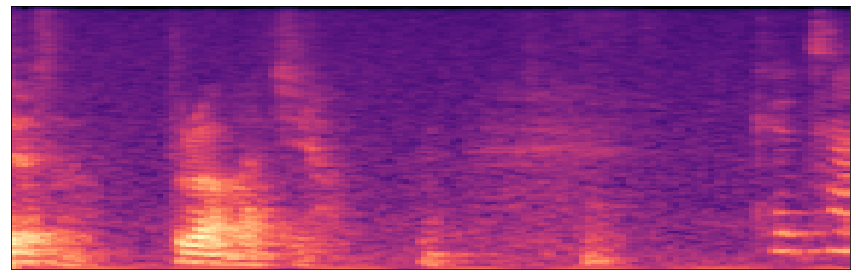

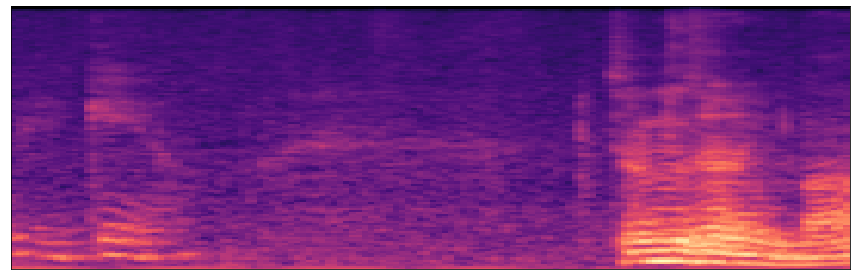

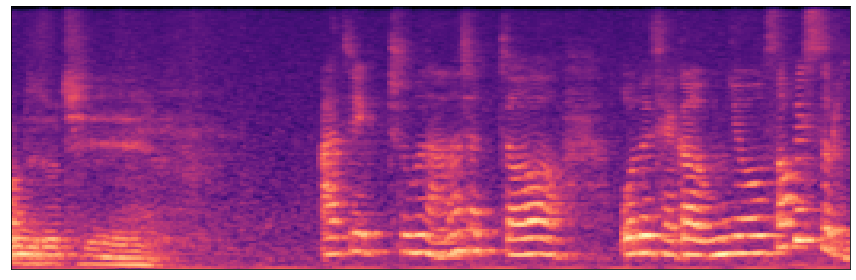

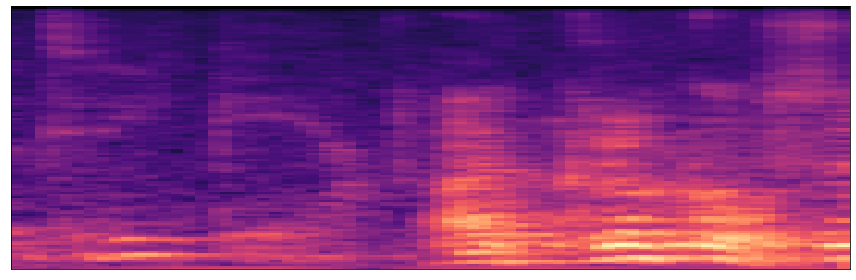

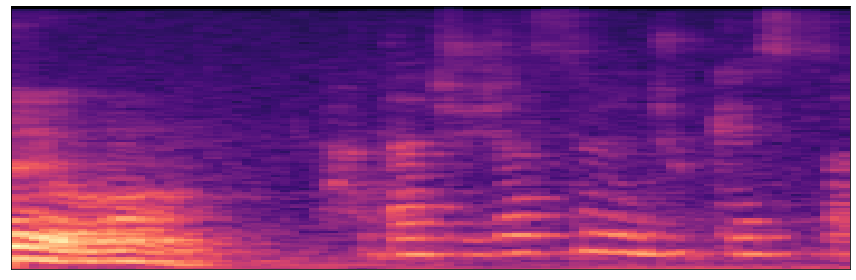

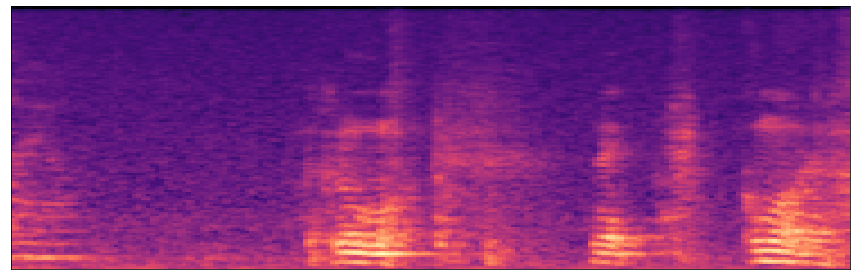

In [220]:
1478894
k= 0
new_arr = []
all_arr = []
for i in range(len(y)):
    if(i>=frame_info_s[k]):
        new_arr.append(y[i])
        if(i==frame_info_e[k]):
            all_arr.append(new_arr)
            print(len(new_arr))
            new_arr = []
            if(k<(len(frame_info_e)-1)):
                k = k+1
all_arr = np.asarray(all_arr) 
print(all_arr.shape)           
S = []
image = []
# Let's make and display a mel-scaled power (energy-squared) spectrogram
for i in range(len(all_arr)):
    
    S = librosa.feature.melspectrogram(np.asarray(all_arr[i]), sr=sr, n_mels=128)
    print(S.shape)
   
    
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    print(log_S.shape)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='off', y_axis='off')

    # Put a descriptive title on the plot
    #plt.title('mel power spectrogram')

    # draw a color bar
    #plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()
    plt.savefig("plot.png")

    S = []

In [157]:
# padding 등 고려 방법만 확정
# data loader -> 다른팀 형식 고려 안해도 되나
# 언어 기준으로 자른것 이므로 순간순간으로 하려면... 몇초간격으로 할것이냐
#

def create_tfrecord(dataset_list):
    print("Start converting...")
    options = tf.python_io.\
        TFRecordOptions(compression_type=tf.python_io.TFRecordCompressionType.GZIP)
    writer = tf.python_io.TFRecordWriter(\
        path="tfrecord/tfrecord_practice.tfrecords",
        options=options
    )
    for dataset in dataset_list:
        audio_file_path = dataset["audio_file_path"]
        script_file_path = dataset["script_file_path"]
        
        # 데이터셋을 미리 전처리하여 TFRecord로 저장
        audio = audio_process.get_audio(audio_file_path)
        
        script = get_script(script_file_path)
        script = script_pad(script)
        
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "audio": _bytes_feature(audio.tostring()),
                    "script": _bytes_feature(script.encode("utf-8")) # string 타입을 bytes 타입으로 변환
                }
            )
        )
        writer.write(example.SerializeToString())
    
    writer.close()
    print("Done...")

In [181]:
print(type(image))
print(len(image))
image = np.array(image)
print(type(label))
print(len(label))
print(label)
#확인중

<class 'list'>
11


ValueError: could not broadcast input array from shape (128,254) into shape (128)

In [113]:
np.save('image_test.npy', image)

ValueError: could not broadcast input array from shape (128,279) into shape (128)